<a href="https://colab.research.google.com/github/antsaaims/DSI/blob/main/DSI_preassesment_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# **DSI PreAssesnment - 2022**

## Antsa Tantely Fandresena Rakotondrafara


My github account : https://github.com/antsaaims


## Part 01

**1 Create a hexagon**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import random as rnd

In [ ]:
xs=[1,1,3,6,7,5,1]#x values of the vertices of my hexagon
ys=[1,3,6,7,4,1,1]#y values of the vertices of my hexagon

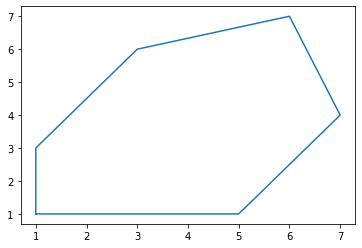

In [ ]:
plt.plot(xs,ys)#ploting my hexagon

2 Pick a random point, P, inside the hexagon.

This is the hardest part of this code so I will do it at the end.

For the question 1 to 4, we will test it with selected points and at the end, after constructing the random point, we will be able to test it. 

Make a triangle, T, by randomly connecting P to two adjacent vertices of the hexagon.

In [ ]:
def hexvertex(i):

  '''This function return a vertex given its range in the list of vertices'''
  return((xs[i%6],ys[i%6]))

In [ ]:
#test
hexvertex(0)#true

(1, 1)

In [ ]:
def triangle(P):
  numvertex=rnd.randint(0,5) # select the first vertices to join with P
  adjacent= numvertex + rnd.choice([-1,1])# select the second vertices to join with
  # P zich should be adjacent to the first one, before or after
  return([P,hexvertex(numvertex),hexvertex(adjacent)]) # list of vertex 

In [ ]:
def showthetriangle(T):
  xt=[]
  yt=[]
  for i in [0,1,2,0]:
    xt.append(T[i][0])#list of xvalues
    yt.append(T[i][1])#list of yvalues
  
  plt.plot(xt,yt)

Let us test if it give us the waited result

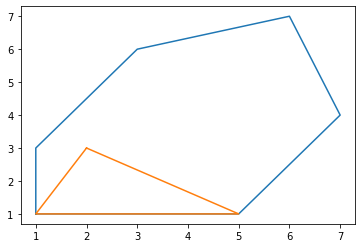

In [ ]:
#test
T=triangle((2,3))
plt.plot(xs,ys)#ploting my hexagon
showthetriangle(T)

Compute the centroid of T

In [ ]:
def centroid(T):
  xG=0
  yG=0
  for i in [0,1,2]:
    xG+=T[i][0]
    yG+=T[i][1]
  return(xG/3,yG/3)

In [ ]:
centroid(T)

(2.6666666666666665, 1.6666666666666667)

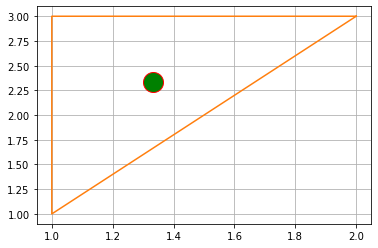

In [ ]:
T=triangle((2,3))
C=centroid(T)
x = C[0]
y = C[1]
plt.grid()
plt.plot(x, y, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="green")
showthetriangle(T)

plt.show()


Compute the centroid of T. This becomes your new random point, P.  Save it, make a new random triangle as above, compute the new centroid etc… Repeat this process 10,000 times. 


In [ ]:
n=10000

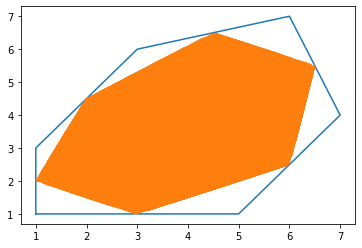

In [ ]:
P=(2,3)
xlist=[]#here is where I will store the x vqlues of the random point
ylist=[]#here is where I will store the x vqlues of the random point
for i in range(n):
  xlist.append(P[0])#storing the value of x
  ylist.append(P[1])#storing the value of y
  P=centroid(triangle(P))
plt.plot(xs,ys)#ploting my hexagon  
plt.plot(xlist,ylist)#ploting the points

In [ ]:
def showshape(P):
  K=P
  xlist=[]#here is where I will store the x vqlues of the random point
  ylist=[]#here is where I will store the x vqlues of the random point
  for i in range(n):
    xlist.append(K[0])#storing the value of x
    ylist.append(K[1])#storing the value of y
    K=centroid(triangle(K))
  plt.plot(xs,ys)#ploting my hexagon  
  plt.plot(xlist,ylist)#ploting the points
  print(K)  

(3.0630297438699565, 4.396018567258571)


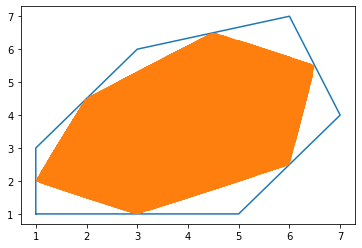

In [ ]:
showshape((2,3))

(3.9709059375671445, 2.1570161730968875)


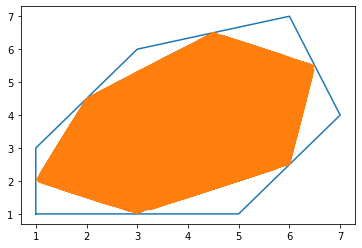

In [ ]:
showshape((6,5))

Let us now use our random point.

So let me first explain the code :

What I know how to do : 
  - Generate a random number in a given range with the uniform distribution with rnd.uniform()
  - So I can now generate points in a rectangle as it is just a couple of random numbers
  - Then, I can generate random points laying in a given rectangle triangle by using the diagonal symetry of the point if the point generated is in the other part of the rectangle
  - Then, I can generate random points in any given triangles by using an affine function from a rectangle triangle
  - Then I can divide my polygon into many triangles
  - So first I need to randomly choose in which of the triangles I will put my random point and then I will select the number randomly from that triangle.





In [ ]:
# Creating a function that generate a random point inside the triangle [(0,0),(1,0),(0;1)]
def sym(point):
  '''This function gives the symetry of a point by the axe y+x=1'''
  x=point[0]
  y=point[1]
  return((-y+1,1-x))


In [ ]:
sym((2,1))#work properly

(0, -1)

In [ ]:
def gernerateintri():
  '''This function generate a random point inside the triangle  [(0,0),(1,0),(0,1)]''' 
  x=rnd.uniform(0,1)
  y=rnd.uniform(0,1)
  if x+y>1: 
    return(sym((x,y)))
  else:
    return((x,y))


In [ ]:
gernerateintri()

(0.740785616355404, 0.057497699780971745)

In [ ]:
# here ze test if the triangle is direct or not and generate the correponding direct triengle

def givedirect(T):
  P=T
  v1=np.array(P[1])-np.array(P[0])
  v2=np.array(P[2])-np.array(P[0])
  a = np.array(([ v1[0], v2[0]],[ v1[1], v2[1]]))
  d=np.linalg.det(a)#test the positivity of teh determinant
  if d<0:
    k=P[1]
    P[1]=P[2]
    P[2]=k
  return P

In [ ]:
T= [(0,0),(1,0),(0,1)]
givedirect(T)

[(0, 0), (1, 0), (0, 1)]

In [ ]:
T= [(0,0),(0,1),(1,0)]
givedirect(T)

[(0, 0), (1, 0), (0, 1)]

As all triangles can be converted to a direct one, we will define an affine map from [(0,0),(0,1),(1,0)] to any given triangle.


let the triangle be (P1,P2,P3) wich is already diret,
then 

let f the function


f((0,0))=P1

f((1,0))=P2

f((0,1))=P3


Then f(a(1,0)+ b(0,1))= a(P2-P1)+b(P3-P1)+P1 

In [ ]:
#generationg a bijective function from [(0,0),(1,0),(0,1)] to any direct triangle ?BOLA MISY TSY %ETY BDB ITY FA JERENA REHEFA LUNDI
def image(point, triangle):
  triangle=givedirect(triangle)
  P1=np.array(triangle[0])
  P2=np.array(triangle[1])
  P3=np.array(triangle[2])

  #eto no misy tsy maharesy lahatra ahy 
  return(point[0]*(P2-P1)+point[1]*(P3-P1) + P1)


In [ ]:
# Dividing our hexagon into 4 triangles
listtriangle=[[hexvertex(i) for i in [0,1,2]],[hexvertex(i) for i in [2,3,4]],[hexvertex(i) for i in [4,5,0]],[hexvertex(i) for i in [0,2,4]] ]

def providetriangle(choice):
  return(listtriangle[choice])



In [ ]:
hexvertex(5)

(5, 1)

In [ ]:
listtriangle

[[(1, 1), (1, 3), (3, 6)],
 [(3, 6), (6, 7), (7, 4)],
 [(7, 4), (5, 1), (1, 1)],
 [(1, 1), (3, 6), (7, 4)]]

In [ ]:
providetriangle(1)

[(3, 6), (6, 7), (7, 4)]

In [ ]:
# generation of a function that select a triangles then give a random point inside the choosen triangle

def choosepoint():
  '''This function generate a random point inside the given hexagon'''
 # CHOOSE THe triangle
  c =rnd.randint(0,3) #choosing wich of the triangle will be selected
  triangle= providetriangle(c)
  point=gernerateintri()#Generate the random point in [(0, 0), (1, 0), (0, 1)]
  return(image(point, triangle))
 # generate a point  in this triangle
 

In [ ]:
P

(2.936146166511089, 1.3677849887778581)

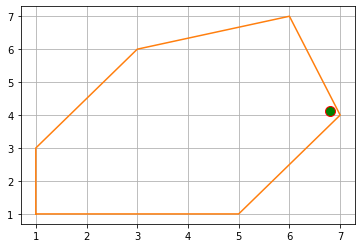

In [ ]:
P= choosepoint()
x = P[0]
y = P[1]
plt.grid()
plt.plot(x, y, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.plot(xs,ys)#ploting my hexagon
plt.show()

(2.5639560302141864, 3.73283862078863)


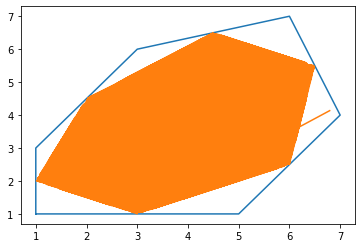

In [ ]:
# test with our function show

showshape(P)

We see that the shape is the hexagon having as vertices the middle points the edges of the original hexagon.

# **Question 2:** Datascience with Pandas and Movie Data

0. Access some historical IMDB data files from the shared drive: 

https://drive.google.com/drive/folders/1dl6nw0HO9XVrT8dSBJHHn3mDW9EWQpXS?usp=sharing


In [11]:
#importing the needed library

import pandas as pd
import zipfile
from google.colab import files
import io

In [12]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [38]:
!ls '/content/gdrive/My Drive/DSI_Pre_Assignment_2022'


'Pre-DSI Assignment.gdoc'   title.basics.tsv.gz
 title.akas.tsv.gz	    title.ratings.tsv.gz


In [39]:
root_path = '/content/gdrive/My Drive/DSI_Pre_Assignment_2022'

In [40]:
ls

 adc.json   Filename.csv   sample_data/             title.akas.tsv.gz
 akas.tsv   gdrive/       'title.akas.tsv (1).gz'   title.basics.tsv.gz


'/content'

1 Read the files 'title.basics.tsv.gz', 'title.akas.tsv.gz' and 'title.ratings.tsv.gz' into three separate dataframes using the read_csv method in Pandas.  


In [50]:
basics = pd.read_csv('/content/gdrive/My Drive/DSI_Pre_Assignment_2022/title.basics.tsv.gz', compression='gzip',  sep='\t')
basics.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [51]:
akas = pd.read_csv('/content/gdrive/My Drive/DSI_Pre_Assignment_2022/title.akas.tsv.gz', compression='gzip',  sep='\t')
akas.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
5,tt0000002,2,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0
6,tt0000002,3,Le clown et ses chiens,FR,\N,\N,\N,0
7,tt0000002,4,Clovnul si cainii sai,RO,\N,imdbDisplay,\N,0
8,tt0000002,5,The Clown and His Dogs,US,\N,\N,literal English title,0
9,tt0000002,6,Клоун и его собаки,RU,\N,\N,\N,0


In [52]:
ratings = pd.read_csv('/content/gdrive/My Drive/DSI_Pre_Assignment_2022/title.ratings.tsv.gz', compression='gzip',  sep='\t')
ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713
5,tt0000006,5.5,88
6,tt0000007,5.5,573
7,tt0000008,5.6,1526
8,tt0000009,5.5,70
9,tt0000010,6.9,5083


2. Drop duplicates in all the dataframes, if there are any. 



3. Using the Pandas 'merge' method, combine all three dataframes using the Title ID (titleID or tconst) to perform the merge and save it into a new dataframe. 

   3.1 How many lines does the resulting dataframe have if you use an inner merge or outer  
   merge? Make sure you understand the difference. 


 3.2 Using the unique() method, compute how many different 'titleTypes' there are 

4. Make a new dataframe from step 3 by selecting only rows corresponding to English-language films ('en') OR US-region films ('US') AND only those that are movies (using the 'titleType' column). Put the resulting data into a new dataframe; call it df_new. 


5. Add a new column to df_new with column title 'log10Votes' which gives the Log_10 number of the 'numVotes' column. 


6. Lower the case of all text in the 'genres' column. 

6. Using Groupby (or other technique) group all data by 'genres' and display the top 10 highest genres by:

    6.1 mean number of log10Votes


6.2 mean averageRating


7. Using ‘groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes. 


8. Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways:

    8.1 Using sklearn


 8.2 Using scipy 

8.3 Using pytorch 

Ensure that you get the same result in each case (or explain why the results are different). You will need to install the corresponding packages. If you wanted to build a better regression model what would you do?  


9. You should commit at least three different versions of your notebook to your github account to demonstrate that you know the basics of using git for version control.

10. Share your notebook with us as a Google Colab notebook. Include your github account in your Colab notebook intro and make sure your commits are public. 
